<a href="https://colab.research.google.com/github/HarrisKucukalic/CSS2_Group_3/blob/main/Group3_Tutorial1_CodeImplementation_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Connect to Google Drive, Import Libraries and Datasets

## Connect to drive and check Directory

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
%cd /content/gdrive/Shareddrives/CSS2 - Research /Research Code

/content/gdrive/Shareddrives/CSS2 - Research /Research Code


In [3]:
!ls

 Angie.ipynb
"Angie's - Group3_Tutorial1_CodeImplementation-1.ipynb"
'AT2 Prezzo.gslides'
'Copy of Group3_Tutorial1_CodeImplementation-1 (1).ipynb'
'Copy of Group3_Tutorial1_CodeImplementation-1 (2).ipynb'
'Copy of Group3_Tutorial1_CodeImplementation-1.ipynb'
 desktop.ini
 Group3_Tutorial1_CodeImplementation-1.ipynb
 Harris.ipynb
'IDS Prezzo Pretty.pptx'
 Isaac.ipynb
 KDDTest+.csv
 KDDTrain+.csv
 mergeNotebooks.ipynb
'Sams Copy of Group3_Tutorial1_CodeImplementation-1.ipynb'
 Samuel.ipynb
 Test_data.csv
 Timothy.ipynb
 Train_data.csv


## Import necessary libraries

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set_theme(rc={"figure.dpi":120, 'savefig.dpi':120})

# sklearn
import sklearn as sk
from sklearn import *
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import *
# SVM
from sklearn.svm import SVC
# DT
from sklearn.tree import DecisionTreeClassifier
# RF
from sklearn.ensemble import RandomForestClassifier

## KDD Data

In [5]:
KDD_Train = pd.read_csv('KDDTrain+.csv')
KDD_Test = pd.read_csv('KDDTest+.csv')
KDD_Train

,0,tcp,ftp_data,SF,491,0.1,0.2,0.3,0.4,0.5,...,0.17,0.03,0.17.1,0.00.6,0.00.7,0.00.8,0.05,0.00.9,normal,20
0,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
1,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19
2,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
3,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21
4,0,tcp,private,REJ,0,0,0,0,0,0,...,0.07,0.07,0.00,0.00,0.00,0.00,1.00,1.00,neptune,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125967,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.06,0.00,0.00,1.00,1.00,0.00,0.00,neptune,20
125968,8,udp,private,SF,105,145,0,0,0,0,...,0.96,0.01,0.01,0.00,0.00,0.00,0.00,0.00,normal,21
125969,0,tcp,smtp,SF,2231,384,0,0,0,0,...,0.12,0.06,0.00,0.00,0.72,0.00,0.01,0.00,normal,18
125970,0,tcp,klogin,S0,0,0,0,0,0,0,...,0.03,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,20


In [6]:
KDD_Test.columns = (['duration', 'protocol_type', 'service', 'flag', 'src_bytes', 'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot', 'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell', 'su_attempted', 'num_root', 'num_file_creations', 'num_shells', 'num_access_files', 'num_outbound_cmds', 'is_host_login', 'is_guest_login', 'count', 'srv_count', 'serror_rate', 'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count', 'dst_host_same_srv_rate', 'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 'dst_host_serror_rate', 'dst_host_srv_serror_rate', 'dst_host_rerror_rate', 'dst_host_srv_rerror_rate', 'attack', 'level'])
KDD_Train.columns = (['duration', 'protocol_type', 'service', 'flag', 'src_bytes', 'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot', 'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell', 'su_attempted', 'num_root', 'num_file_creations', 'num_shells', 'num_access_files', 'num_outbound_cmds', 'is_host_login', 'is_guest_login', 'count', 'srv_count', 'serror_rate', 'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count', 'dst_host_same_srv_rate', 'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 'dst_host_serror_rate', 'dst_host_srv_serror_rate', 'dst_host_rerror_rate', 'dst_host_srv_rerror_rate', 'attack', 'level'])

# Preprocessing

In [7]:
total_rows = len(KDD_Train)

missing_values = KDD_Train.isna().sum()

percentage_missing = (missing_values / total_rows) * 100
percentage_missing = percentage_missing.round(2)
print(percentage_missing)

duration                       0.0
protocol_type                  0.0
service                        0.0
flag                           0.0
src_bytes                      0.0
dst_bytes                      0.0
land                           0.0
wrong_fragment                 0.0
urgent                         0.0
hot                            0.0
num_failed_logins              0.0
logged_in                      0.0
num_compromised                0.0
root_shell                     0.0
su_attempted                   0.0
num_root                       0.0
num_file_creations             0.0
num_shells                     0.0
num_access_files               0.0
num_outbound_cmds              0.0
is_host_login                  0.0
is_guest_login                 0.0
count                          0.0
srv_count                      0.0
serror_rate                    0.0
srv_serror_rate                0.0
rerror_rate                    0.0
srv_rerror_rate                0.0
same_srv_rate       

In [8]:
total_rows = len(KDD_Test)

missing_values = KDD_Test.isna().sum()

percentage_missing = (missing_values / total_rows) * 100
percentage_missing = percentage_missing.round(2)
print(percentage_missing)

duration                       0.0
protocol_type                  0.0
service                        0.0
flag                           0.0
src_bytes                      0.0
dst_bytes                      0.0
land                           0.0
wrong_fragment                 0.0
urgent                         0.0
hot                            0.0
num_failed_logins              0.0
logged_in                      0.0
num_compromised                0.0
root_shell                     0.0
su_attempted                   0.0
num_root                       0.0
num_file_creations             0.0
num_shells                     0.0
num_access_files               0.0
num_outbound_cmds              0.0
is_host_login                  0.0
is_guest_login                 0.0
count                          0.0
srv_count                      0.0
serror_rate                    0.0
srv_serror_rate                0.0
rerror_rate                    0.0
srv_rerror_rate                0.0
same_srv_rate       

## Testing Data

In [9]:
for column in KDD_Train.columns:
    print(f"Counts for {column}:")
    print(KDD_Train[column].value_counts())
    print("------------")

Counts for duration:
duration
0        115954
1          1989
2           843
3           557
4           351
          ...  
4946          1
5284          1
20771         1
3294          1
679           1
Name: count, Length: 2981, dtype: int64
------------
Counts for protocol_type:
protocol_type
tcp     102688
udp      14993
icmp      8291
Name: count, dtype: int64
------------
Counts for service:
service
http         40338
private      21853
domain_u      9043
smtp          7313
ftp_data      6859
             ...  
tftp_u           3
http_8001        2
aol              2
harvest          2
http_2784        1
Name: count, Length: 70, dtype: int64
------------
Counts for flag:
flag
SF        74944
S0        34851
REJ       11233
RSTR       2421
RSTO       1562
S1          365
SH          271
S2          127
RSTOS0      103
S3           49
OTH          46
Name: count, dtype: int64
------------
Counts for src_bytes:
src_bytes
0        49392
8         3691
1         2432
44        2334


In [10]:
for column in KDD_Test.columns:
    print(f"Counts for {column}:")
    print(KDD_Train[column].value_counts())
    print("------------")

Counts for duration:
duration
0        115954
1          1989
2           843
3           557
4           351
          ...  
4946          1
5284          1
20771         1
3294          1
679           1
Name: count, Length: 2981, dtype: int64
------------
Counts for protocol_type:
protocol_type
tcp     102688
udp      14993
icmp      8291
Name: count, dtype: int64
------------
Counts for service:
service
http         40338
private      21853
domain_u      9043
smtp          7313
ftp_data      6859
             ...  
tftp_u           3
http_8001        2
aol              2
harvest          2
http_2784        1
Name: count, Length: 70, dtype: int64
------------
Counts for flag:
flag
SF        74944
S0        34851
REJ       11233
RSTR       2421
RSTO       1562
S1          365
SH          271
S2          127
RSTOS0      103
S3           49
OTH          46
Name: count, dtype: int64
------------
Counts for src_bytes:
src_bytes
0        49392
8         3691
1         2432
44        2334


In [11]:
train_attack_categories = KDD_Train['attack'].unique()
test_attack_categories = KDD_Test['attack'].unique()
print(set(train_attack_categories) == set(test_attack_categories))

False


In [12]:
train_attack_categories

array(['normal', 'neptune', 'warezclient', 'ipsweep', 'portsweep',
       'teardrop', 'nmap', 'satan', 'smurf', 'pod', 'back',
       'guess_passwd', 'ftp_write', 'multihop', 'rootkit',
       'buffer_overflow', 'imap', 'warezmaster', 'phf', 'land',
       'loadmodule', 'spy', 'perl'], dtype=object)

In [13]:
test_attack_categories

array(['neptune', 'normal', 'saint', 'mscan', 'guess_passwd', 'smurf',
       'apache2', 'satan', 'buffer_overflow', 'back', 'warezmaster',
       'snmpgetattack', 'processtable', 'pod', 'httptunnel', 'nmap', 'ps',
       'snmpguess', 'ipsweep', 'mailbomb', 'portsweep', 'multihop',
       'named', 'sendmail', 'loadmodule', 'xterm', 'worm', 'teardrop',
       'rootkit', 'xlock', 'perl', 'land', 'xsnoop', 'sqlattack',
       'ftp_write', 'imap', 'udpstorm', 'phf'], dtype=object)

In [14]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder

# Define the desired order of categories, i.e. not alphabetical
desired_categories = ['tcp', 'udp', 'icmp']

# Assuming KDD_Train and KDD_Test are your DataFrames
# If not, replace them with your actual DataFrames

# Perform one-hot encoding
onehot = OneHotEncoder(categories=[desired_categories], dtype=int, sparse=False)
kdd_train_encoded = onehot.fit_transform(KDD_Train[['protocol_type']])
kdd_test_encoded = onehot.fit_transform(KDD_Test[['protocol_type']])

# Convert the one-hot encoded arrays back to DataFrames
kdd_train_encoded_df = pd.DataFrame(kdd_train_encoded, columns=[f'protocol_type_{cat}' for cat in desired_categories])
kdd_test_encoded_df = pd.DataFrame(kdd_test_encoded, columns=[f'protocol_type_{cat}' for cat in desired_categories])

# Concatenate the original DataFrames with the encoded columns
KDD_Train_encoded = pd.concat([KDD_Train, kdd_train_encoded_df], axis=1)
KDD_Test_encoded = pd.concat([KDD_Test, kdd_test_encoded_df], axis=1)

# Drop the original 'protocol_type' column since it's now encoded
KDD_Train_encoded.drop('protocol_type', axis=1, inplace=True)
KDD_Test_encoded.drop('protocol_type', axis=1, inplace=True)

# Move 'attack' and 'level' columns to the end
KDD_Train_encoded = KDD_Train_encoded.reindex(columns=[col for col in KDD_Train_encoded.columns if col not in ['attack', 'level']] + ['attack', 'level'])
KDD_Test_encoded = KDD_Test_encoded.reindex(columns=[col for col in KDD_Test_encoded.columns if col not in ['attack', 'level']] + ['attack', 'level'])

# Check the first few rows of the updated DataFrames
KDD_Train_encoded


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,duration,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,...,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,protocol_type_tcp,protocol_type_udp,protocol_type_icmp,attack,level
0,0,other,SF,146,0,0,0,0,0,0,...,0.00,0.00,0.00,0.00,0.00,0,1,0,normal,15
1,0,private,S0,0,0,0,0,0,0,0,...,0.00,1.00,1.00,0.00,0.00,1,0,0,neptune,19
2,0,http,SF,232,8153,0,0,0,0,0,...,0.04,0.03,0.01,0.00,0.01,1,0,0,normal,21
3,0,http,SF,199,420,0,0,0,0,0,...,0.00,0.00,0.00,0.00,0.00,1,0,0,normal,21
4,0,private,REJ,0,0,0,0,0,0,0,...,0.00,0.00,0.00,1.00,1.00,1,0,0,neptune,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125967,0,private,S0,0,0,0,0,0,0,0,...,0.00,1.00,1.00,0.00,0.00,1,0,0,neptune,20
125968,8,private,SF,105,145,0,0,0,0,0,...,0.00,0.00,0.00,0.00,0.00,0,1,0,normal,21
125969,0,smtp,SF,2231,384,0,0,0,0,0,...,0.00,0.72,0.00,0.01,0.00,1,0,0,normal,18
125970,0,klogin,S0,0,0,0,0,0,0,0,...,0.00,1.00,1.00,0.00,0.00,1,0,0,neptune,20


In [15]:
attack_groups = {
    'DoS': ['neptune', 'smurf', 'teardrop', 'pod', 'land', 'back', 'apache2', 'snmpgetattack', 'processtable', 'pod', 'udpstorm', 'worm', 'teardrop', 'land'],
    'probe_attack': ['saint', 'mscan', 'satan', 'ipsweep', 'portsweep', 'nmap', 'snmpguess', 'ipsweep', 'portsweep', 'multihop', 'named', 'sendmail', 'xterm', 'xsnoop', 'sqlattack'],
    'unauthorised': ['guess_passwd', 'imap', 'multihop', 'phf', 'spy', 'mailbomb', 'httptunnel', 'ps', 'xlock'],
    'malware': ['warezclient', 'buffer_overflow', 'warezmaster', 'rootkit', 'loadmodule', 'perl', 'ftp_write'],
    'normal': ['normal']
}

def categorize_attack(attack):
    for group, attacks in attack_groups.items():
        if attack in attacks:
            return group

KDD_Train_encoded['attack_group'] = KDD_Train_encoded['attack'].apply(categorize_attack)
KDD_Test_encoded['attack_group'] = KDD_Test_encoded['attack'].apply(categorize_attack)

KDD_Train_encoded

,duration,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,...,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,protocol_type_tcp,protocol_type_udp,protocol_type_icmp,attack,level,attack_group
0,0,other,SF,146,0,0,0,0,0,0,...,0.00,0.00,0.00,0.00,0,1,0,normal,15,normal
1,0,private,S0,0,0,0,0,0,0,0,...,1.00,1.00,0.00,0.00,1,0,0,neptune,19,DoS
2,0,http,SF,232,8153,0,0,0,0,0,...,0.03,0.01,0.00,0.01,1,0,0,normal,21,normal
3,0,http,SF,199,420,0,0,0,0,0,...,0.00,0.00,0.00,0.00,1,0,0,normal,21,normal
4,0,private,REJ,0,0,0,0,0,0,0,...,0.00,0.00,1.00,1.00,1,0,0,neptune,21,DoS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125967,0,private,S0,0,0,0,0,0,0,0,...,1.00,1.00,0.00,0.00,1,0,0,neptune,20,DoS
125968,8,private,SF,105,145,0,0,0,0,0,...,0.00,0.00,0.00,0.00,0,1,0,normal,21,normal
125969,0,smtp,SF,2231,384,0,0,0,0,0,...,0.72,0.00,0.01,0.00,1,0,0,normal,18,normal
125970,0,klogin,S0,0,0,0,0,0,0,0,...,1.00,1.00,0.00,0.00,1,0,0,neptune,20,DoS


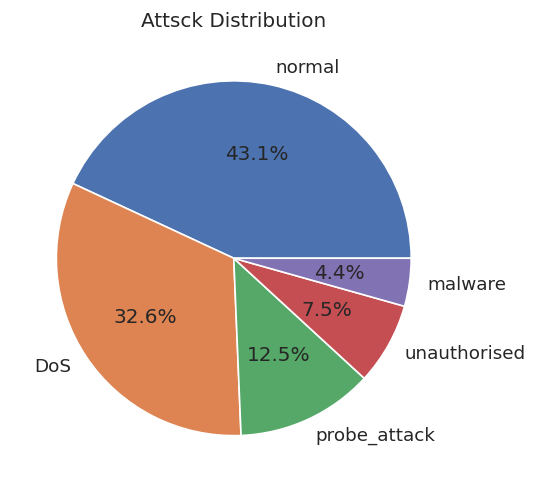

In [16]:
label_counts = KDD_Test_encoded['attack_group'].value_counts()
plt.pie(label_counts, labels=label_counts.index, autopct='%1.1f%%')
plt.title('Attsck Distribution')
plt.show()

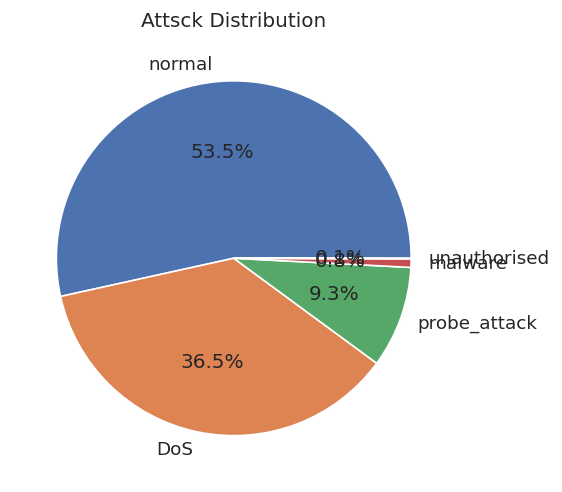

In [17]:
label_counts = KDD_Train_encoded['attack_group'].value_counts()
plt.pie(label_counts, labels=label_counts.index, autopct='%1.1f%%')
plt.title('Attsck Distribution')
plt.show()

In [18]:
# import LabelEncoder from sklearn.preprocessing
from sklearn.preprocessing import LabelEncoder
# Instantiate the encoder
le = LabelEncoder()
le.fit(KDD_Train_encoded['attack_group'])
# le.fit(KDD_Test_encoded['attack'])
KDD_Train_encoded['attack_group']=le.transform(KDD_Train_encoded['attack_group'])
# KDD_Test_encoded['attack']=le.transform(KDD_Test_encoded['attack'])
KDD_Train_encoded

,duration,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,...,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,protocol_type_tcp,protocol_type_udp,protocol_type_icmp,attack,level,attack_group
0,0,other,SF,146,0,0,0,0,0,0,...,0.00,0.00,0.00,0.00,0,1,0,normal,15,2
1,0,private,S0,0,0,0,0,0,0,0,...,1.00,1.00,0.00,0.00,1,0,0,neptune,19,0
2,0,http,SF,232,8153,0,0,0,0,0,...,0.03,0.01,0.00,0.01,1,0,0,normal,21,2
3,0,http,SF,199,420,0,0,0,0,0,...,0.00,0.00,0.00,0.00,1,0,0,normal,21,2
4,0,private,REJ,0,0,0,0,0,0,0,...,0.00,0.00,1.00,1.00,1,0,0,neptune,21,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125967,0,private,S0,0,0,0,0,0,0,0,...,1.00,1.00,0.00,0.00,1,0,0,neptune,20,0
125968,8,private,SF,105,145,0,0,0,0,0,...,0.00,0.00,0.00,0.00,0,1,0,normal,21,2
125969,0,smtp,SF,2231,384,0,0,0,0,0,...,0.72,0.00,0.01,0.00,1,0,0,normal,18,2
125970,0,klogin,S0,0,0,0,0,0,0,0,...,1.00,1.00,0.00,0.00,1,0,0,neptune,20,0


In [19]:
label_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print(label_mapping)

{'DoS': 0, 'malware': 1, 'normal': 2, 'probe_attack': 3, 'unauthorised': 4}


In [20]:
le.fit(KDD_Test_encoded['attack_group'])
KDD_Test_encoded['attack_group']=le.transform(KDD_Test_encoded['attack_group'])
KDD_Test_encoded

,duration,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,...,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,protocol_type_tcp,protocol_type_udp,protocol_type_icmp,attack,level,attack_group
0,0,private,REJ,0,0,0,0,0,0,0,...,0.00,0.0,1.00,1.00,1,0,0,neptune,21,0
1,2,ftp_data,SF,12983,0,0,0,0,0,0,...,0.00,0.0,0.00,0.00,1,0,0,normal,21,2
2,0,eco_i,SF,20,0,0,0,0,0,0,...,0.00,0.0,0.00,0.00,0,0,1,saint,15,3
3,1,telnet,RSTO,0,15,0,0,0,0,0,...,0.00,0.0,0.83,0.71,1,0,0,mscan,11,3
4,0,http,SF,267,14515,0,0,0,0,0,...,0.01,0.0,0.00,0.00,1,0,0,normal,21,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22538,0,smtp,SF,794,333,0,0,0,0,0,...,0.01,0.0,0.00,0.00,1,0,0,normal,21,2
22539,0,http,SF,317,938,0,0,0,0,0,...,0.01,0.0,0.00,0.00,1,0,0,normal,21,2
22540,0,http,SF,54540,8314,0,0,0,2,0,...,0.00,0.0,0.07,0.07,1,0,0,back,15,0
22541,0,domain_u,SF,42,42,0,0,0,0,0,...,0.00,0.0,0.00,0.00,0,1,0,normal,21,2


#Attribute Analyses and Input selection

In [21]:
KDD_Train_encoded.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,protocol_type_tcp,protocol_type_udp,protocol_type_icmp,level,attack_group
count,125972.000000,1.259720e+05,1.259720e+05,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,...,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000,125972.000000
mean,287.146929,4.556710e+04,1.977927e+04,0.000198,0.022688,0.000111,0.204411,0.001222,0.395739,0.279253,...,0.032543,0.284455,0.278487,0.118832,0.120241,0.815165,0.119019,0.065816,19.504056,1.356833
std,2604.525522,5.870354e+06,4.021285e+06,0.014086,0.253531,0.014366,2.149977,0.045239,0.489011,23.942137,...,0.112564,0.444785,0.445670,0.306559,0.319460,0.388165,0.323812,0.247962,2.291512,1.071063
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,18.000000,0.000000
50%,0.000000,4.400000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,20.000000,2.000000
75%,0.000000,2.760000e+02,5.160000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.020000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,21.000000,2.000000
max,42908.000000,1.379964e+09,1.309937e+09,1.000000,3.000000,3.000000,77.000000,5.000000,1.000000,7479.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,21.000000,4.000000


In [22]:
Train_numeric_cols = KDD_Train_encoded.select_dtypes(include=['number'])
Test_numeric_cols = KDD_Test_encoded.select_dtypes(include=['number'])
Train_numeric_cols

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,protocol_type_tcp,protocol_type_udp,protocol_type_icmp,level,attack_group
0,0,146,0,0,0,0,0,0,0,0,...,0.00,0.00,0.00,0.00,0.00,0,1,0,15,2
1,0,0,0,0,0,0,0,0,0,0,...,0.00,1.00,1.00,0.00,0.00,1,0,0,19,0
2,0,232,8153,0,0,0,0,0,1,0,...,0.04,0.03,0.01,0.00,0.01,1,0,0,21,2
3,0,199,420,0,0,0,0,0,1,0,...,0.00,0.00,0.00,0.00,0.00,1,0,0,21,2
4,0,0,0,0,0,0,0,0,0,0,...,0.00,0.00,0.00,1.00,1.00,1,0,0,21,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125967,0,0,0,0,0,0,0,0,0,0,...,0.00,1.00,1.00,0.00,0.00,1,0,0,20,0
125968,8,105,145,0,0,0,0,0,0,0,...,0.00,0.00,0.00,0.00,0.00,0,1,0,21,2
125969,0,2231,384,0,0,0,0,0,1,0,...,0.00,0.72,0.00,0.01,0.00,1,0,0,18,2
125970,0,0,0,0,0,0,0,0,0,0,...,0.00,1.00,1.00,0.00,0.00,1,0,0,20,0


In [23]:
from sklearn.feature_selection import mutual_info_classif

X = Train_numeric_cols.drop('attack_group', axis=1)
y = Train_numeric_cols['attack_group']

mutual_info = mutual_info_classif(X, y)
attribute_info_gain = pd.Series(mutual_info, index=X.columns)

top_ten_attributes = attribute_info_gain.nlargest(10)

print(top_ten_attributes)

src_bytes                 0.716838
diff_srv_rate             0.506961
same_srv_rate             0.471326
dst_bytes                 0.461442
dst_host_diff_srv_rate    0.450558
dst_host_srv_count        0.419219
count                     0.411012
dst_host_same_srv_rate    0.406287
dst_host_serror_rate      0.403399
serror_rate               0.388854
dtype: float64


In [24]:
int_corr = Train_numeric_cols[['src_bytes', 'diff_srv_rate', 'same_srv_rate', 'dst_bytes', 'dst_host_diff_srv_rate', 'dst_host_srv_count', 'count', 'dst_host_same_srv_rate', 'dst_host_serror_rate', 'serror_rate', 'attack_group']]

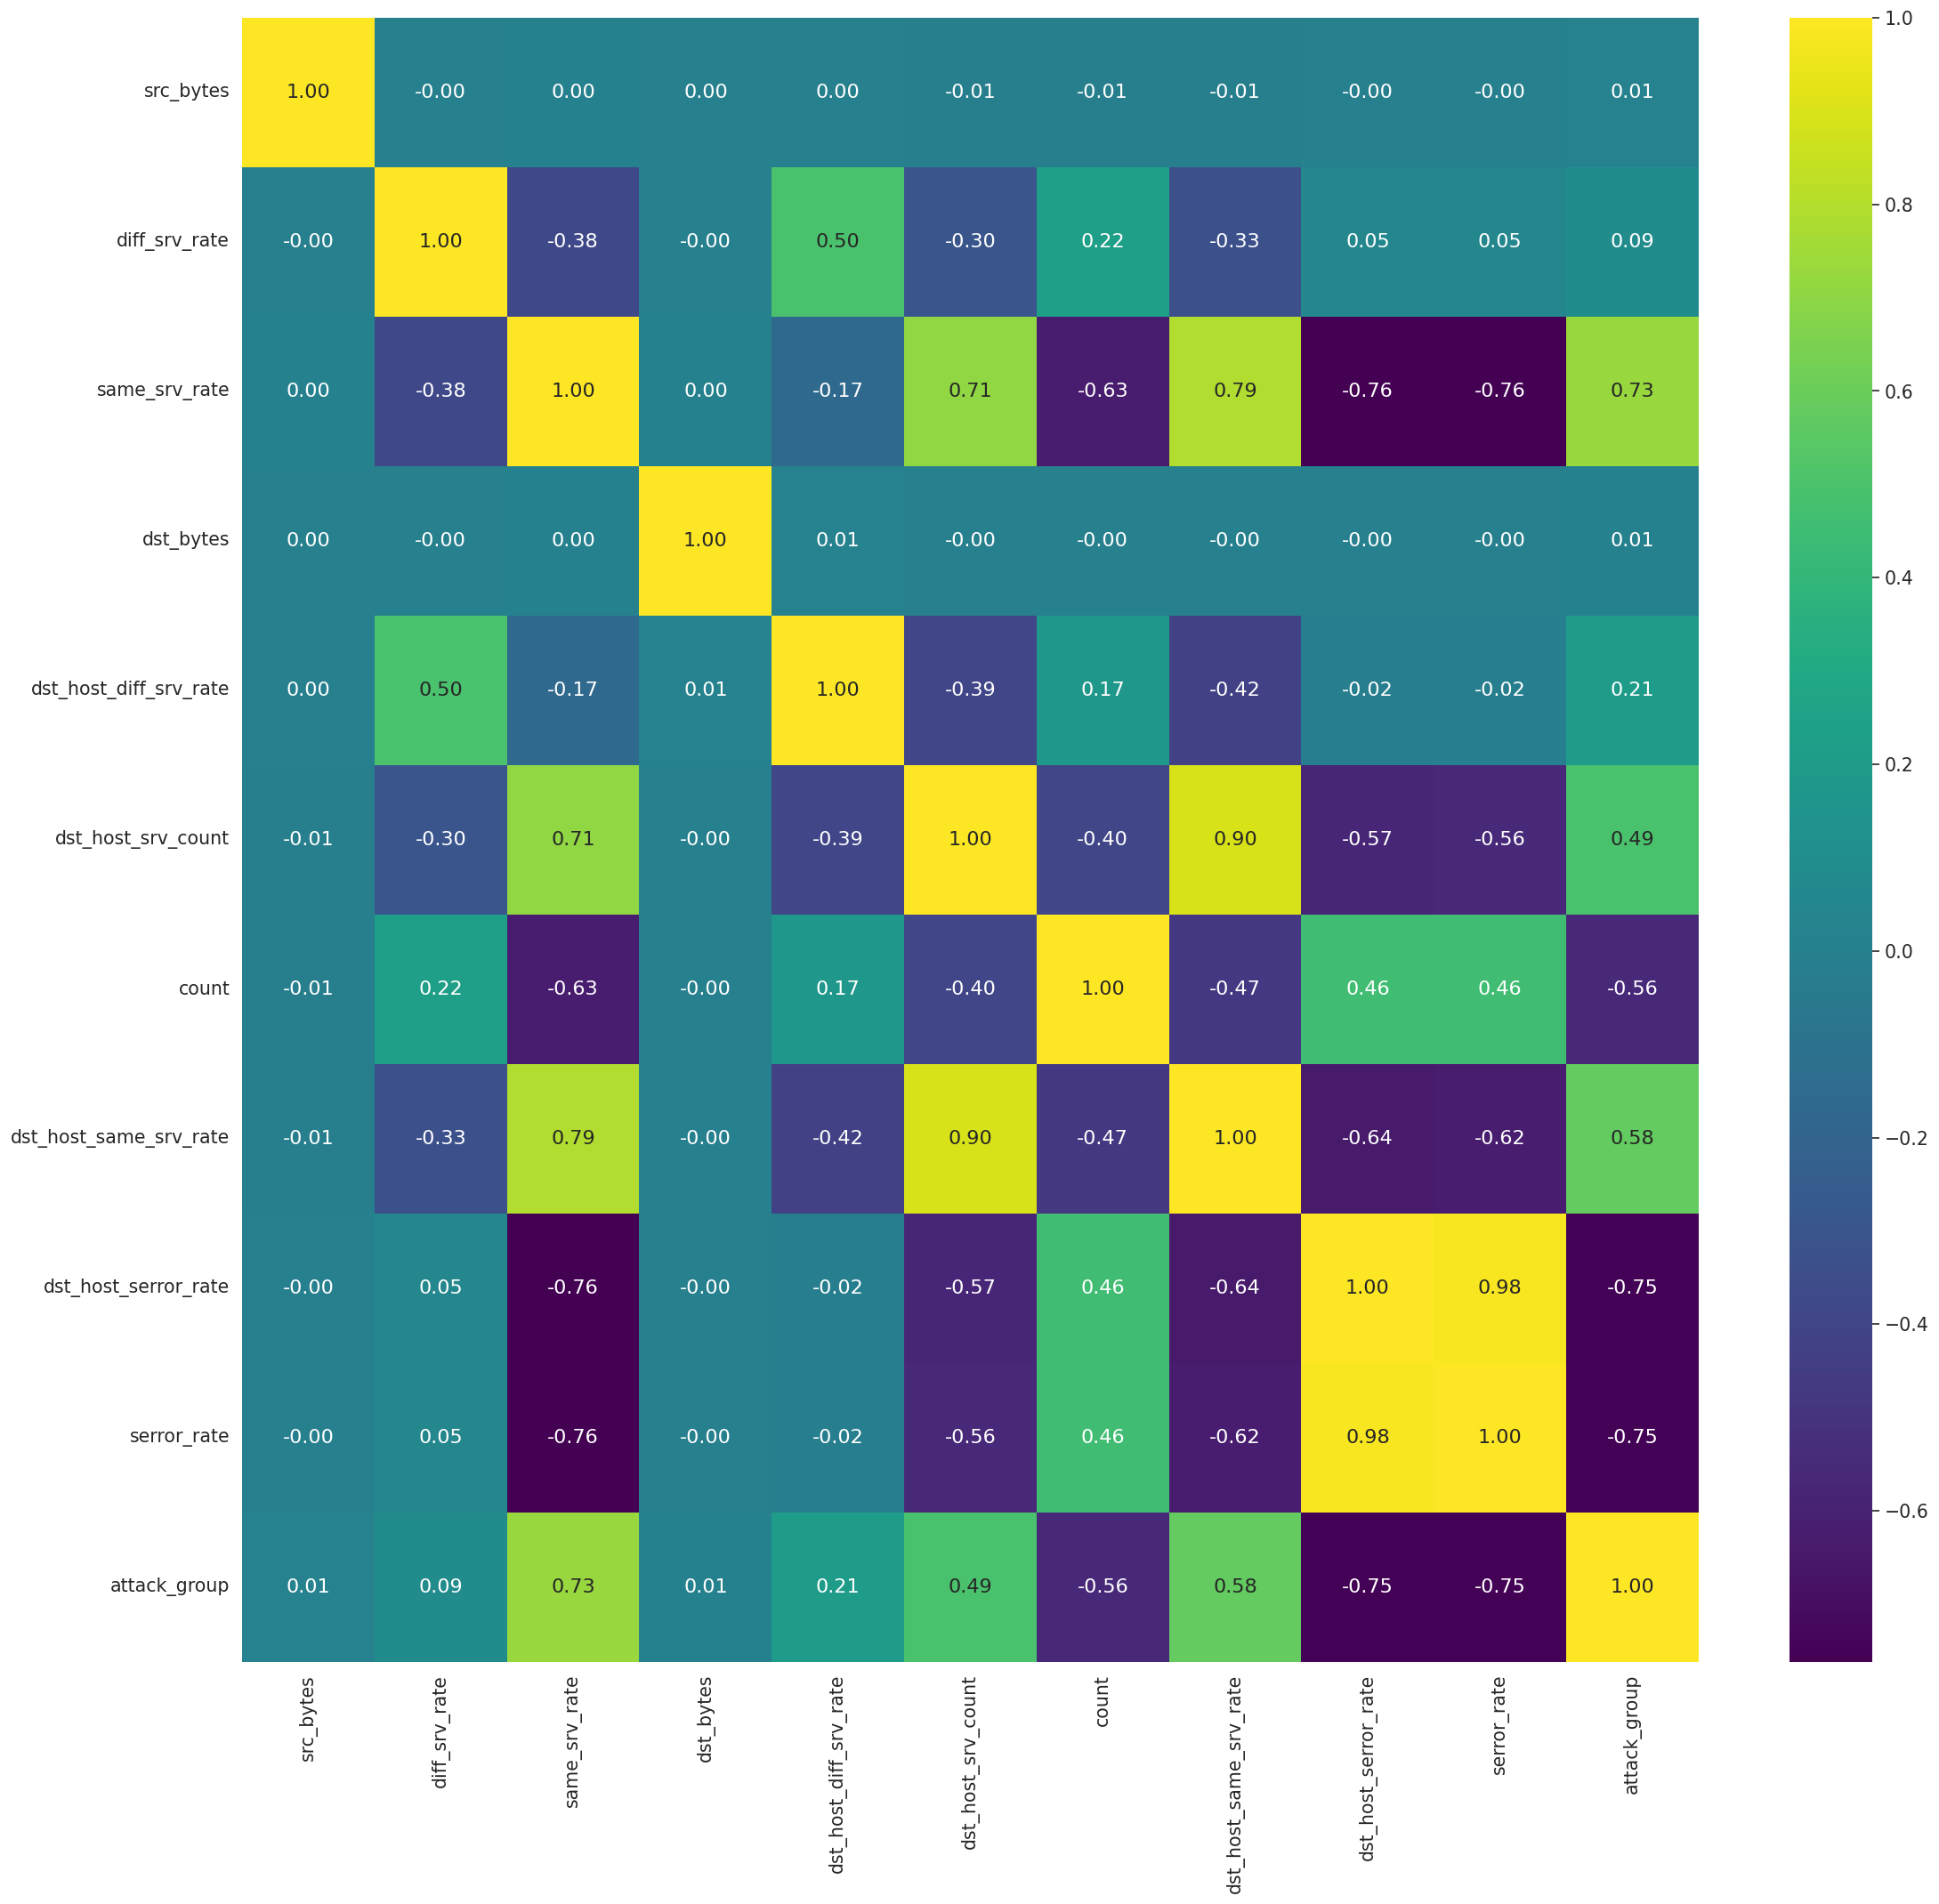

In [25]:
int_corr = int_corr.corr()
plt.figure(figsize=(22, 20))
sns.set_context('paper', font_scale=1.4)
sns.heatmap(int_corr, annot=True, cmap='viridis', fmt='.2f')
plt.show()

# xgBoost - benchmark and GA Accuracy measure

In [26]:
from sklearn.model_selection import train_test_split
# X_base = int_data_no_strings.drop(["class_label"], axis=1)
# y_base = int_data_no_strings["class_label"]
X_base = Train_numeric_cols.drop(["attack_group"], axis=1)
y_base = Train_numeric_cols["attack_group"]
X_train_base, X_test_base, y_train_base, y_test_base = train_test_split(X_base, y_base, test_size=0.3)
X_base

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,protocol_type_tcp,protocol_type_udp,protocol_type_icmp,level
0,0,146,0,0,0,0,0,0,0,0,...,0.88,0.00,0.00,0.00,0.00,0.00,0,1,0,15
1,0,0,0,0,0,0,0,0,0,0,...,0.00,0.00,1.00,1.00,0.00,0.00,1,0,0,19
2,0,232,8153,0,0,0,0,0,1,0,...,0.03,0.04,0.03,0.01,0.00,0.01,1,0,0,21
3,0,199,420,0,0,0,0,0,1,0,...,0.00,0.00,0.00,0.00,0.00,0.00,1,0,0,21
4,0,0,0,0,0,0,0,0,0,0,...,0.00,0.00,0.00,0.00,1.00,1.00,1,0,0,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125967,0,0,0,0,0,0,0,0,0,0,...,0.00,0.00,1.00,1.00,0.00,0.00,1,0,0,20
125968,8,105,145,0,0,0,0,0,0,0,...,0.01,0.00,0.00,0.00,0.00,0.00,0,1,0,21
125969,0,2231,384,0,0,0,0,0,1,0,...,0.00,0.00,0.72,0.00,0.01,0.00,1,0,0,18
125970,0,0,0,0,0,0,0,0,0,0,...,0.00,0.00,1.00,1.00,0.00,0.00,1,0,0,20


In [27]:
# Get the last two hundred samples from the test  to be the future data samples
futureSample_X_base = X_test_base[-2500:]
futureSample_y_base = y_test_base[-2500:]

# Remove the last two hundred samples from the test dataset
X_test_base = X_test_base[0:-2500]
y_test_base = y_test_base[0:-2500]

In [28]:
X_test_base

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,protocol_type_tcp,protocol_type_udp,protocol_type_icmp,level
42609,0,262,14245,0,0,0,0,0,1,0,...,0.12,0.07,0.00,0.00,0.00,0.00,1,0,0,21
22289,0,0,0,0,0,0,0,0,0,0,...,0.01,1.00,0.00,0.00,0.90,1.00,1,0,0,16
16467,0,0,0,0,0,0,0,0,0,0,...,0.00,0.00,1.00,1.00,0.00,0.00,1,0,0,21
108542,0,0,0,0,0,0,0,0,0,0,...,0.00,0.00,1.00,1.00,0.00,0.00,1,0,0,20
94326,0,0,0,0,0,0,0,0,0,0,...,0.00,0.00,1.00,1.00,0.00,0.00,1,0,0,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72893,0,0,0,0,0,0,0,0,0,0,...,0.00,0.00,1.00,1.00,0.00,0.00,1,0,0,19
55867,18,1351,372,0,0,0,0,0,1,0,...,0.09,0.10,0.00,0.00,0.00,0.00,1,0,0,20
44707,0,0,0,0,0,0,0,0,0,0,...,0.00,0.00,1.00,1.00,0.00,0.00,1,0,0,19
23731,0,0,0,0,0,0,0,0,0,0,...,0.00,0.00,1.00,1.00,0.00,0.00,1,0,0,21


In [29]:
from sklearn.ensemble import GradientBoostingClassifier
xgBoostClassifier = GradientBoostingClassifier()
xgBoostClassifier.fit(X_test_base, y_test_base)

GradientBoostingClassifier()

## Measure Gradient Boost's performance

In [30]:
# Predict the class labels of samples in the test dataset
y_pred_xgb = xgBoostClassifier.predict(X_test_base)

In [31]:
score_test = accuracy_score(y_test_base, y_pred_xgb)
print (score_test)

0.9997449846990819


In [32]:
precision_test = precision_score(y_test_base, y_pred_xgb, average='macro')
print (precision_test)

0.9988911330249806


In [33]:
recall_test = recall_score(y_test_base, y_pred_xgb, average='macro')
print (recall_test)

0.9997467034765876


In [34]:
f1_test =  f1_score(y_test_base, y_pred_xgb, average='macro')
print(f1_test)

0.9993181573724271


{'DoS': 0, 'malware': 1, 'normal': 2, 'probe_attack': 3, 'unauthorised': 4}

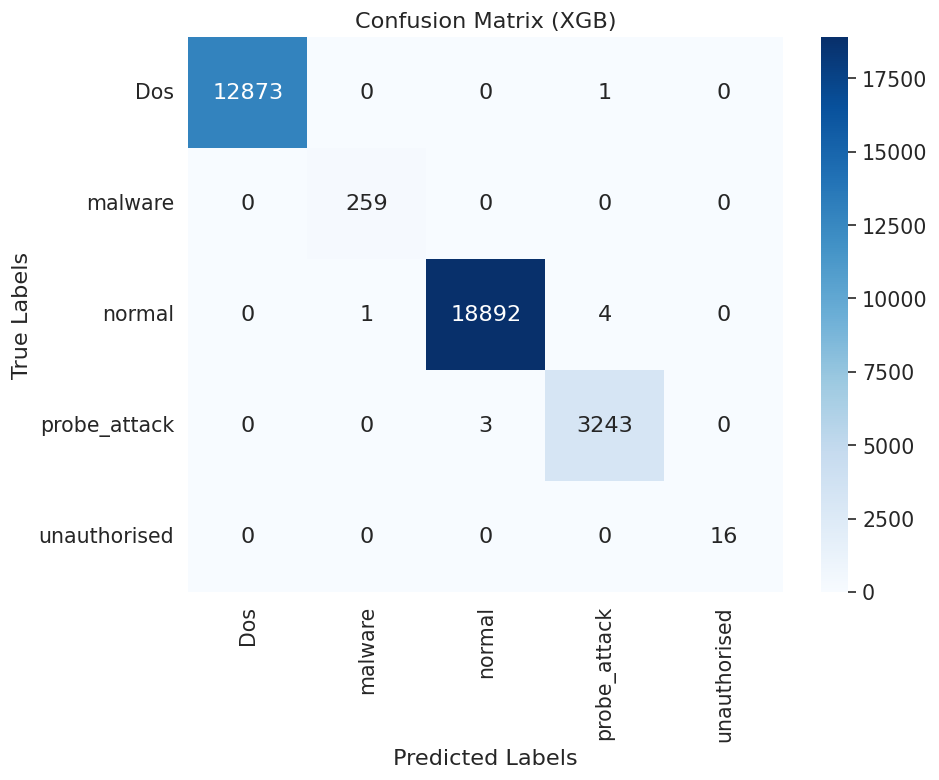

In [35]:
mat = confusion_matrix(y_test_base, y_pred_xgb)
class_names = ["Dos", "malware", "normal", "probe_attack", "unauthorised"]
plt.figure(figsize=(8, 6))
sns.heatmap(mat, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix (XGB)")
plt.show()

In [36]:
y_test_base

42609     2
22289     3
16467     0
108542    0
94326     0
         ..
72893     0
55867     2
44707     0
23731     0
29229     0
Name: attack_group, Length: 35292, dtype: int64

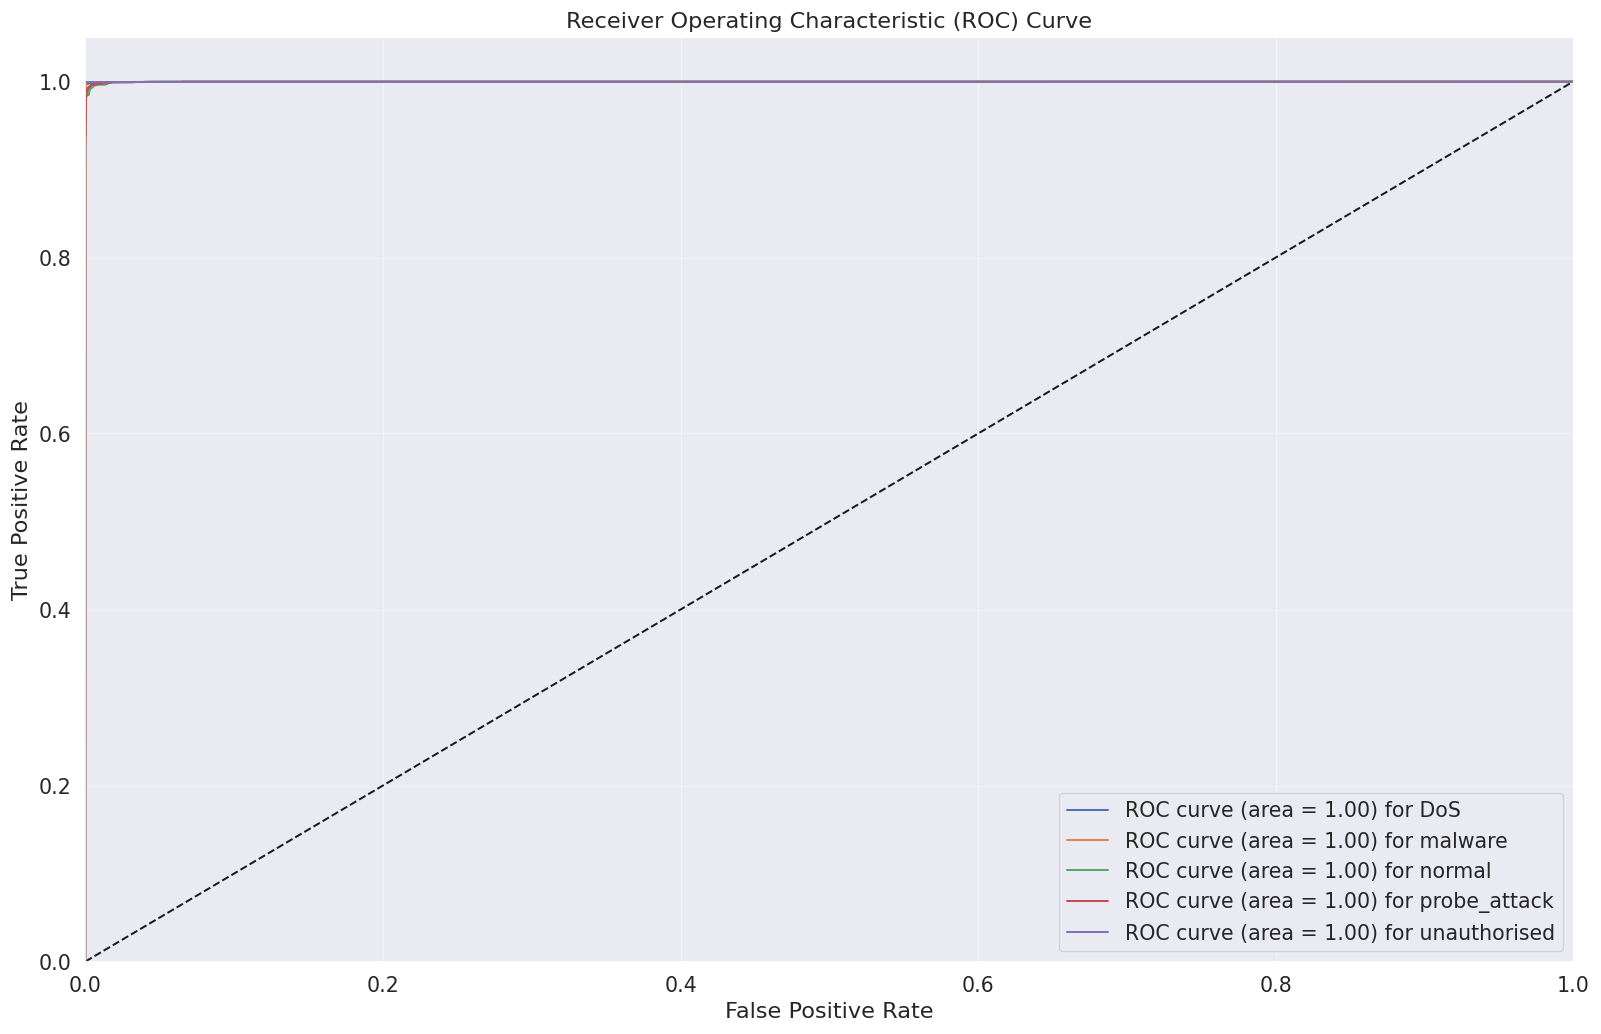

In [37]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

def plot_multiclass_roc(clf, X_test_base, y_test_base, n_classes, class_labels, figsize=(17, 6)):
    y_score = clf.decision_function(X_test_base)

    # structures
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    # calculate dummies once
    y_test_dummies = pd.get_dummies(y_test_base, drop_first=False).values
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_dummies[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # roc for each class
    fig, ax = plt.subplots(figsize=figsize)
    ax.plot([0, 1], [0, 1], 'k--')
    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title('Receiver Operating Characteristic (ROC) Curve')
    for i in range(n_classes):
        ax.plot(fpr[i], tpr[i], label=f'ROC curve (area = {roc_auc[i]:.2f}) for {class_labels[i]}')
    ax.legend(loc="best")
    ax.grid(alpha=.4)
    sns.despine()
    plt.show()

# Define the class labels according to the specified array
class_labels = ['DoS', 'malware', 'normal', 'probe_attack', 'unauthorised']

# Call the function with the modified class_labels array
plot_multiclass_roc(xgBoostClassifier, X_test_base, y_test_base, n_classes=5, class_labels=class_labels, figsize=(16, 10))


## Measuring performance on small unseen set

In [38]:
solution_validate = xgBoostClassifier.predict(futureSample_X_base)

In [39]:
score_validate = accuracy_score(futureSample_y_base, solution_validate)
print (score_validate)

0.9984


## Measuring performance on Test Set

In [40]:
from sklearn.model_selection import train_test_split
# X_base = int_data_no_strings.drop(["class_label"], axis=1)
# y_base = int_data_no_strings["class_label"]
X_T = Test_numeric_cols.drop(["attack_group"], axis=1)
y_T = Test_numeric_cols["attack_group"]

In [41]:
test_val = xgBoostClassifier.predict(X_T)

In [42]:
score_test = accuracy_score(y_T, test_val)
print (score_test)

0.767777137027015


In [43]:
precision_test = precision_score(y_T, test_val, average='macro')
print (precision_test)

0.7316495521170269


In [44]:
recall_test = recall_score(y_T, test_val, average='macro')
print (recall_test)

0.5035429896301479


In [45]:
f1_test =  f1_score(y_T, test_val, average='macro')
print(f1_test)

0.5144618206118643


{'DoS': 0, 'malware': 1, 'normal': 2, 'probe_attack': 3, 'unauthorised': 4}

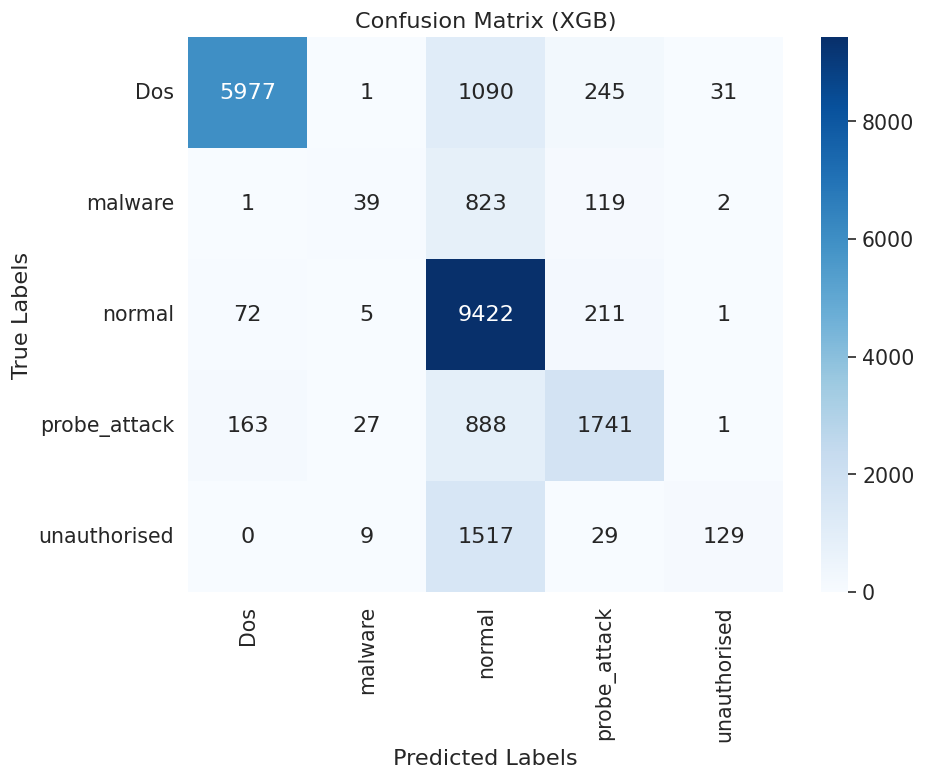

In [46]:
mat = confusion_matrix(y_T, test_val)
class_names = ["Dos", "malware", "normal", "probe_attack", "unauthorised"]
plt.figure(figsize=(8, 6))
sns.heatmap(mat, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix (XGB)")
plt.show()

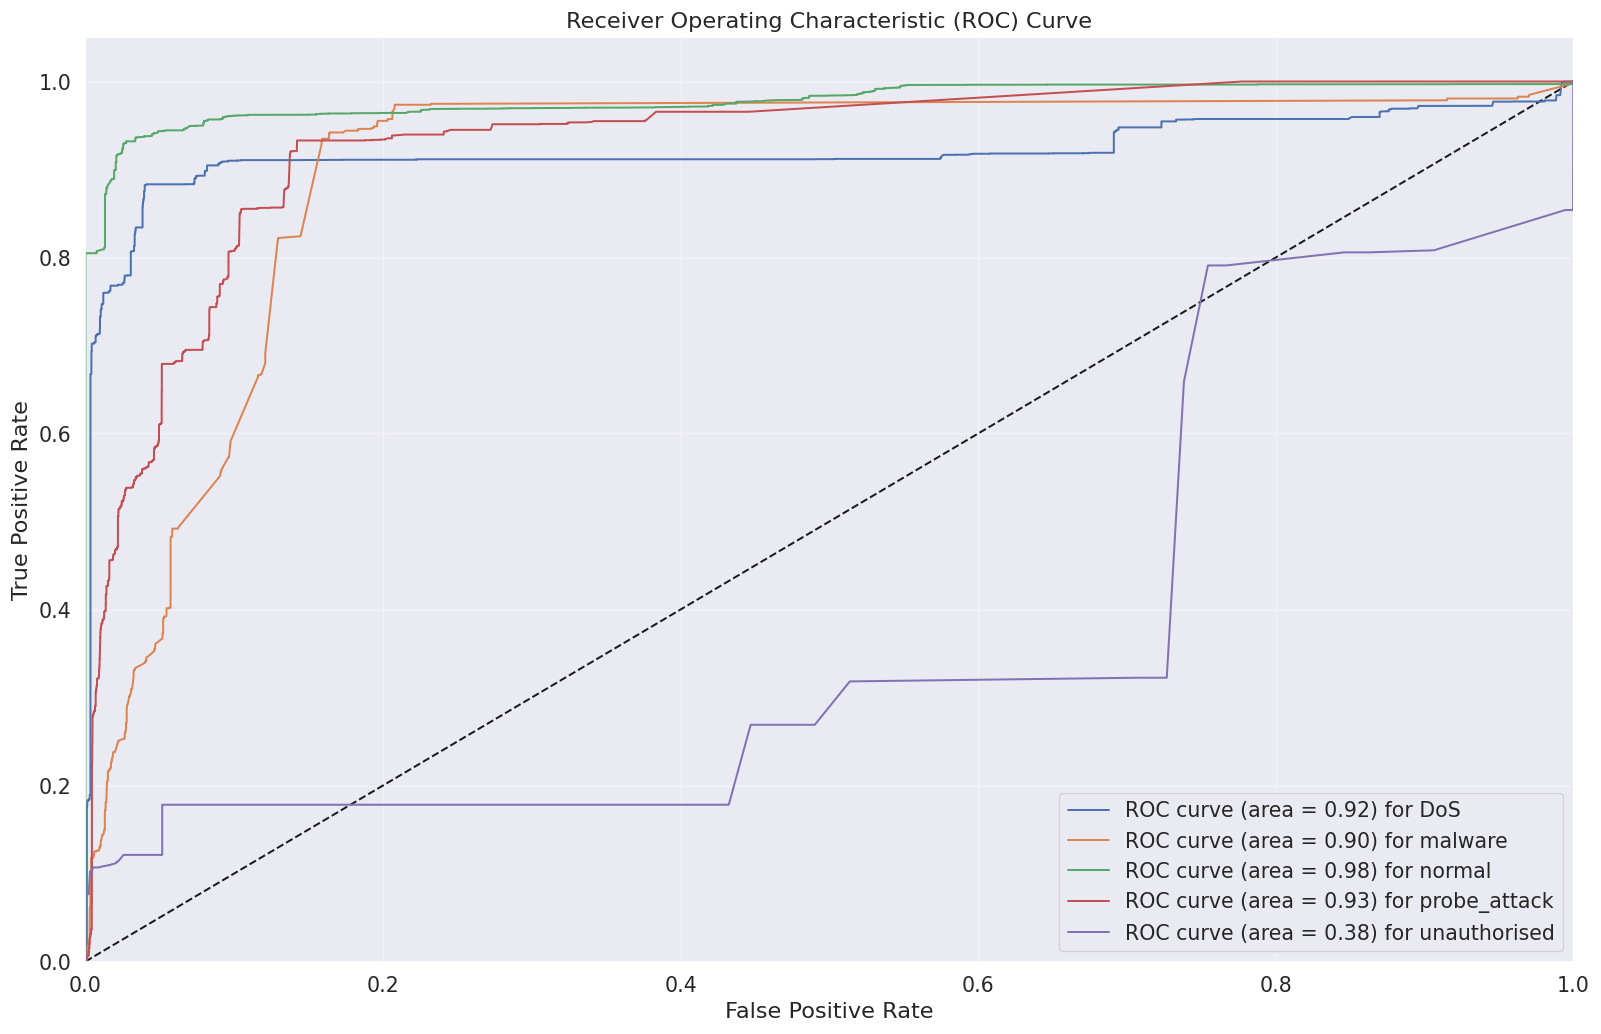

In [47]:
plot_multiclass_roc(xgBoostClassifier, X_T, y_T, n_classes=5, class_labels=class_labels, figsize=(16, 10))

# Genetic Algorithm - Feature Selection (Using Models)

Reference - https://www.kaggle.com/code/tanmayunhale/genetic-algorithm-for-feature-selection

In [48]:
def initilization_of_population(size,n_feat):
    population = []
    for i in range(size):
        chromosome = np.ones(n_feat,dtype=bool)
        chromosome[:int(0.3*n_feat)]=False
        np.random.shuffle(chromosome)
        population.append(chromosome)
    return population

In [49]:
def fitness_score(population):
    scores = []
    for chromosome in population:
        logmodel.fit(X_train_base.iloc[:,chromosome],y_train_base)
        predictions = logmodel.predict(X_test_base.iloc[:,chromosome])
        scores.append(accuracy_score(y_test_base,predictions))
    scores, population = np.array(scores), np.array(population)
    inds = np.argsort(scores)
    return list(scores[inds][::-1]), list(population[inds,:][::-1])

In [50]:
def selection(pop_after_fit,n_parents):
    population_nextgen = []
    for i in range(n_parents):
        population_nextgen.append(pop_after_fit[i])
    return population_nextgen

In [51]:
def crossover(pop_after_sel):
    pop_nextgen = pop_after_sel
    for i in range(0,len(pop_after_sel),2):
        new_par = []
        child_1 , child_2 = pop_nextgen[i] , pop_nextgen[i+1]
        new_par = np.concatenate((child_1[:len(child_1)//2],child_2[len(child_1)//2:]))
        pop_nextgen.append(new_par)
    return pop_nextgen


In [52]:
def mutation(pop_after_cross,mutation_rate,n_feat):
    mutation_range = int(mutation_rate*n_feat)
    pop_next_gen = []
    for n in range(0,len(pop_after_cross)):
        chromo = pop_after_cross[n]
        rand_posi = []
        for i in range(0,mutation_range):
            pos = np.random.randint(0,n_feat-1)
            rand_posi.append(pos)
        for j in rand_posi:
            chromo[j] = not chromo[j]
        pop_next_gen.append(chromo)
    return pop_next_gen

In [53]:
def generations(df,label,size,n_feat,n_parents,mutation_rate,n_gen,X_train,
                                   X_test, Y_train, Y_test):
    best_chromo= []
    best_score= []
    population_nextgen=initilization_of_population(size,n_feat)
    for i in range(n_gen):
        scores, pop_after_fit = fitness_score(population_nextgen)
        print('Best score in generation',i+1,':',scores[:1])  #2
        pop_after_sel = selection(pop_after_fit,n_parents)
        pop_after_cross = crossover(pop_after_sel)
        population_nextgen = mutation(pop_after_cross,mutation_rate,n_feat)
        best_chromo.append(pop_after_fit[0])
        best_score.append(scores[0])
    return best_chromo,best_score

In [54]:
z = X_base.shape[1]
z

42

In [56]:
logmodel = xgBoostClassifier
chromo_df_bc, score_bc = generations(X_base,y_base,size=40, n_feat=X_base.shape[1], n_parents=32,
                                  mutation_rate=0.20,n_gen=3, X_train = X_train_base,
                                  X_test = X_test_base, Y_train = y_train_base, Y_test = y_test_base)

KeyboardInterrupt: 

In [ ]:
len(int_data_no_strings.columns)

In [ ]:
# selected_features = X_base.columns[chromo_df_bc[4]]
# print(selected_features.tolist())

In [ ]:
# len(selected_features.tolist())

# Support Vector Machine

In [48]:
from sklearn.preprocessing import StandardScaler
from matplotlib import pyplot
# Create a subset of the dataset excluding the specified columns
c = Train_numeric_cols.copy()
subset_data_train = c.drop(columns=['attack_group'])

# Perform z-score normalization on the selected numeric columns
std_scaler = StandardScaler()
normalized_data_train = std_scaler.fit_transform(subset_data_train)

# Create a DataFrame with normalized numeric columns
normalized_df_train = pd.DataFrame(normalized_data_train, columns=subset_data_train.columns)

# Add the 'attack_group' column back to the normalized DataFrame
normalized_df_train['attack_group'] = Train_numeric_cols['attack_group']

# Describe the normalized DataFrame
normalized_df_train

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,protocol_type_tcp,protocol_type_udp,protocol_type_icmp,level,attack_group
0,-0.110250,-0.007737,-0.004919,-0.014089,-0.089487,-0.007736,-0.095076,-0.027023,-0.809267,-0.011664,...,-0.289105,-0.639535,-0.624874,-0.387635,-0.376389,-2.100057,2.720672,-0.26543,-1.965547,2
1,-0.110250,-0.007762,-0.004919,-0.014089,-0.089487,-0.007736,-0.095076,-0.027023,-0.809267,-0.011664,...,-0.289105,1.608750,1.618946,-0.387635,-0.376389,0.476178,-0.367556,-0.26543,-0.219968,0
2,-0.110250,-0.007723,-0.002891,-0.014089,-0.089487,-0.007736,-0.095076,-0.027023,1.235686,-0.011664,...,0.066249,-0.572087,-0.602436,-0.387635,-0.345086,0.476178,-0.367556,-0.26543,0.652822,2
3,-0.110250,-0.007728,-0.004814,-0.014089,-0.089487,-0.007736,-0.095076,-0.027023,1.235686,-0.011664,...,-0.289105,-0.639535,-0.624874,-0.387635,-0.376389,0.476178,-0.367556,-0.26543,0.652822,2
4,-0.110250,-0.007762,-0.004919,-0.014089,-0.089487,-0.007736,-0.095076,-0.027023,-0.809267,-0.011664,...,-0.289105,-0.639535,-0.624874,2.874397,2.753901,0.476178,-0.367556,-0.26543,0.652822,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125967,-0.110250,-0.007762,-0.004919,-0.014089,-0.089487,-0.007736,-0.095076,-0.027023,-0.809267,-0.011664,...,-0.289105,1.608750,1.618946,-0.387635,-0.376389,0.476178,-0.367556,-0.26543,0.216427,0
125968,-0.107178,-0.007744,-0.004883,-0.014089,-0.089487,-0.007736,-0.095076,-0.027023,-0.809267,-0.011664,...,-0.289105,-0.639535,-0.624874,-0.387635,-0.376389,-2.100057,2.720672,-0.26543,0.652822,2
125969,-0.110250,-0.007382,-0.004823,-0.014089,-0.089487,-0.007736,-0.095076,-0.027023,1.235686,-0.011664,...,-0.289105,0.979230,-0.624874,-0.355015,-0.376389,0.476178,-0.367556,-0.26543,-0.656363,2
125970,-0.110250,-0.007762,-0.004919,-0.014089,-0.089487,-0.007736,-0.095076,-0.027023,-0.809267,-0.011664,...,-0.289105,1.608750,1.618946,-0.387635,-0.376389,0.476178,-0.367556,-0.26543,0.216427,0


In [49]:
normalized_df_train = normalized_df_train[['src_bytes', 'diff_srv_rate', 'same_srv_rate', 'dst_bytes', 'dst_host_diff_srv_rate', 'dst_host_srv_count', 'count', 'dst_host_same_srv_rate', 'dst_host_serror_rate', 'serror_rate', 'attack_group']]

In [50]:
from sklearn.model_selection import train_test_split
X_train = normalized_df_train.drop(["attack_group"], axis=1)
y_train = normalized_df_train["attack_group"]
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.3)
X_train

,src_bytes,diff_srv_rate,same_srv_rate,dst_bytes,dst_host_diff_srv_rate,dst_host_srv_count,count,dst_host_same_srv_rate,dst_host_serror_rate,serror_rate
80929,-0.007762,-0.016932,-1.071205,-0.004919,-0.174419,-0.773729,0.191181,-0.893743,1.608750,1.602655
113633,-0.007762,-0.127850,-1.298673,-0.004919,-0.174419,-0.882128,1.029547,-1.005115,1.608750,1.602655
89488,-0.007762,4.087012,-0.593521,-0.004919,0.037309,-0.999560,-0.690851,-1.116486,1.608750,1.602655
25697,-0.007704,-0.349685,0.771288,-0.004872,-0.439079,1.258746,-0.725783,1.066393,-0.639535,-0.637213
14067,-0.007762,0.038526,-0.934724,-0.004919,-0.280283,-0.538865,-0.201804,-0.671000,1.608750,1.602655
...,...,...,...,...,...,...,...,...,...,...
87174,-0.007762,-0.016932,-1.139445,-0.004919,-0.015623,-0.891161,0.339641,-1.005115,1.608750,1.602655
80822,-0.007708,-0.349685,0.771288,-0.003043,-0.439079,1.258746,-0.717050,1.066393,-0.639535,-0.637213
23177,-0.007762,-0.016932,-1.389660,-0.004919,-0.015623,-0.963427,1.745652,-1.071937,1.608750,1.602655
99841,-0.007761,-0.349685,0.771288,-0.004867,0.619561,-1.026660,-0.725783,-1.094212,-0.639535,-0.637213


In [51]:
# Get the last two hundred samples from the test  to be the future data samples
futureSample_X = X_test[-2500:]
futureSample_y = y_test[-2500:]

# Remove the last two hundred samples from the test dataset
X_test = X_test[0:-2500]
y_test = y_test[0:-2500]

## Train SVM

In [52]:
SVM_classifier = SVC(probability=True)
SVM_classifier.fit(X_train, y_train)

SVC(probability=True)

## Measure SVM's performance

In [67]:
# Predict the class labels of samples in the test dataset
y_pred_SVM = SVM_classifier.predict(X_test)

In [68]:
score_test = accuracy_score(y_test, y_pred_SVM)
print (score_test)

0.9245721409951264


In [69]:
precision_test = precision_score(y_test, y_pred_SVM, average='macro')
print (precision_test)

0.7179014955058325


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [70]:
recall_test = recall_score(y_test, y_pred_SVM, average='macro')
print (recall_test)

0.5570383439875434


In [71]:
f1_test =  f1_score(y_test, y_pred_SVM, average='macro')
print(f1_test)

0.5544492106034705


In [72]:
X_test.shape

(35292, 10)

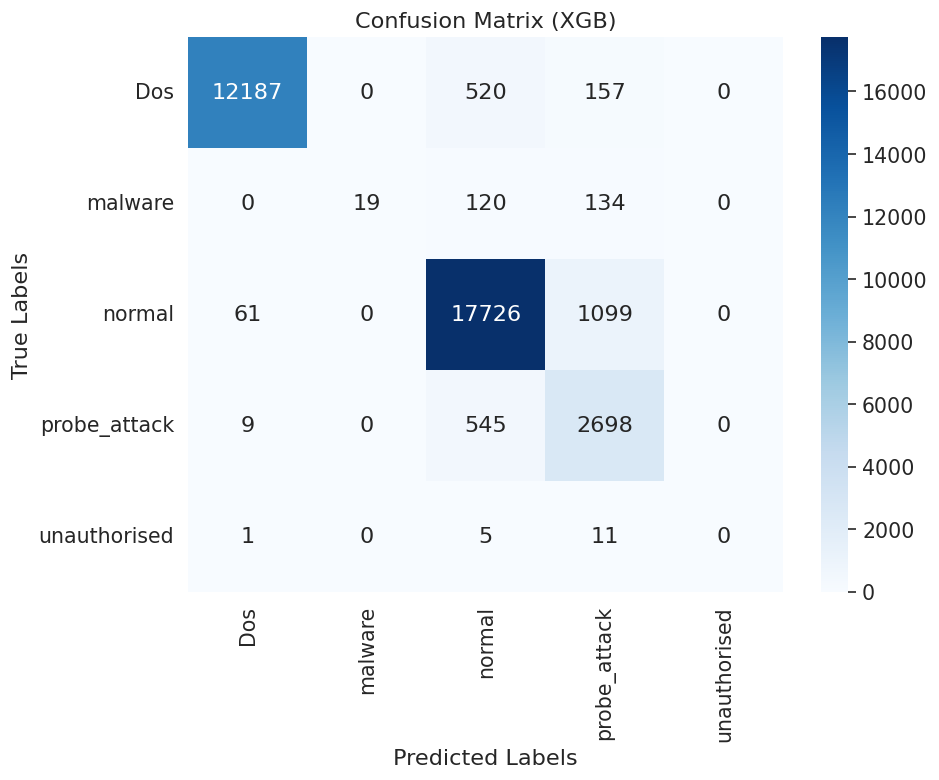

In [73]:
mat = confusion_matrix(y_test, y_pred_SVM)
class_names = ["Dos", "malware", "normal", "probe_attack", "unauthorised"]
plt.figure(figsize=(8, 6))
sns.heatmap(mat, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix (XGB)")
plt.show()

In [74]:
report = classification_report(y_test, y_pred_SVM)
print(report)

              precision    recall  f1-score   support

           0       0.99      0.95      0.97     12864
           1       1.00      0.07      0.13       273
           2       0.94      0.94      0.94     18886
           3       0.66      0.83      0.73      3252
           4       0.00      0.00      0.00        17

    accuracy                           0.92     35292
   macro avg       0.72      0.56      0.55     35292
weighted avg       0.93      0.92      0.92     35292



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## ROC Curve

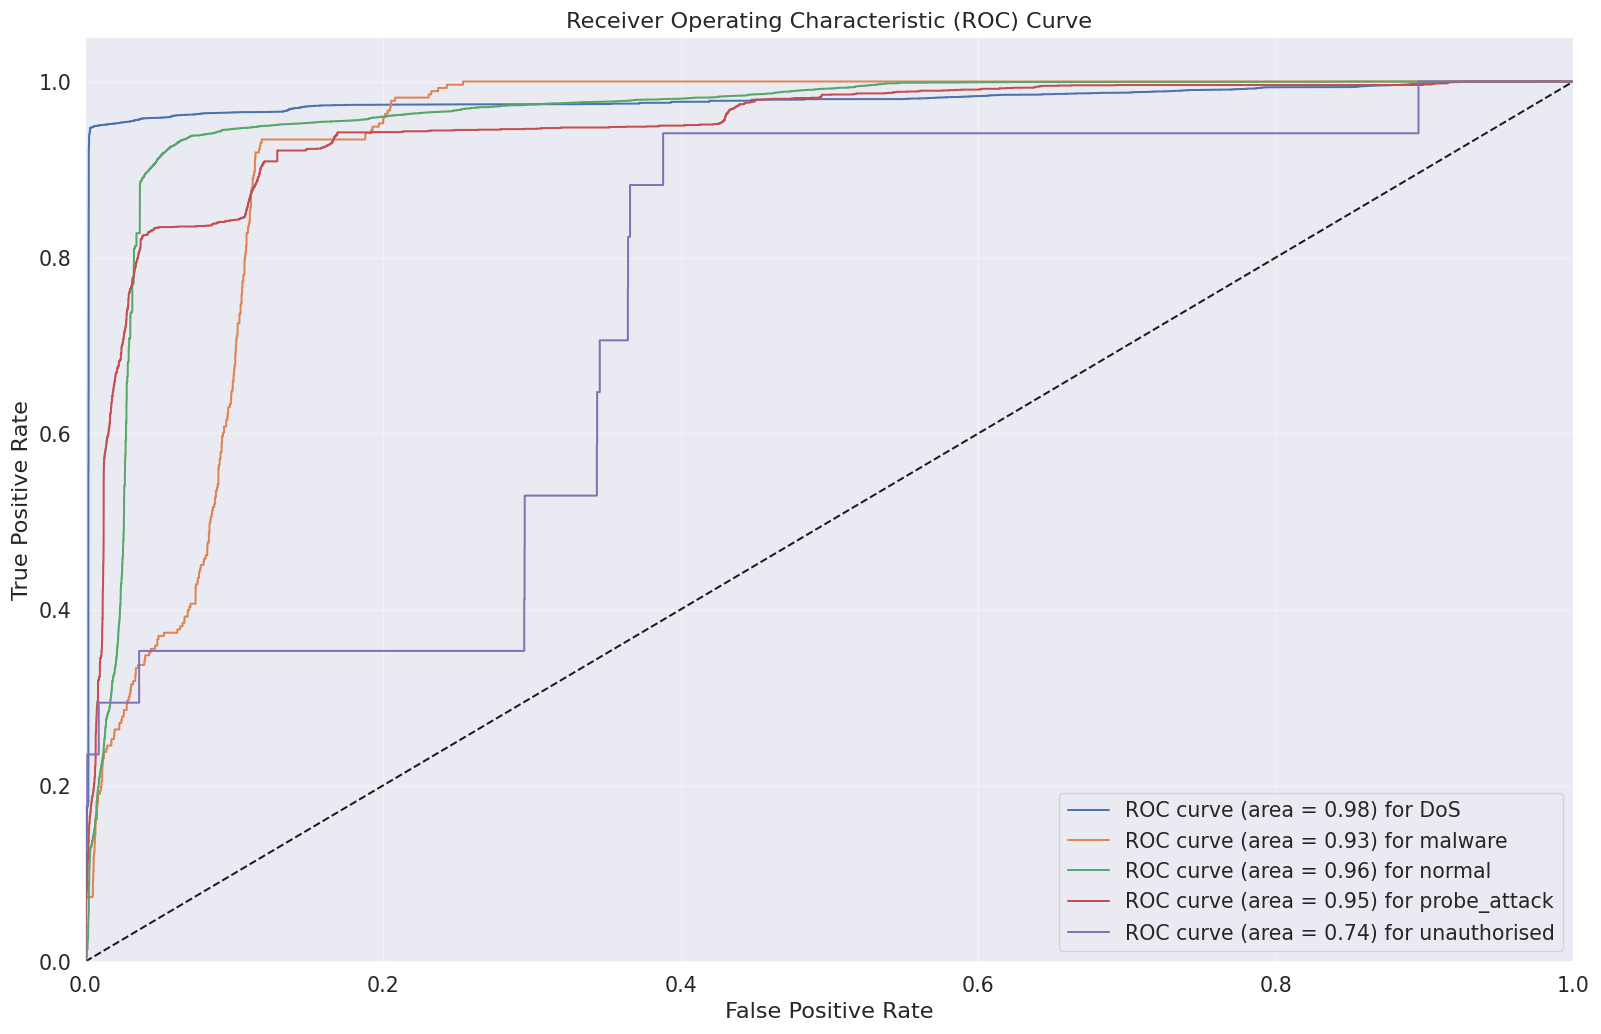

In [75]:
plot_multiclass_roc(SVM_classifier, X_test, y_test, n_classes=5, class_labels=class_labels, figsize=(16, 10))

## Measuring performance on small unseen set

In [76]:
solution_validate = SVM_classifier.predict(futureSample_X)

In [77]:
score_validate = accuracy_score(futureSample_y, solution_validate)
print (score_validate)

0.9244


## Measuring performance on Test Set

In [83]:
from sklearn.preprocessing import StandardScaler
from matplotlib import pyplot
# Create a subset of the dataset excluding the specified columns
c = Test_numeric_cols.copy()
subset_data_test = c.drop(columns=['attack_group'])

# Perform z-score normalization on the selected numeric columns
std_scaler = StandardScaler()
normalized_data_test = std_scaler.fit_transform(subset_data_test)

# Create a DataFrame with normalized numeric columns
normalized_data_test = pd.DataFrame(normalized_data_test, columns=subset_data_test.columns)

# Add the 'attack_group' column back to the normalized DataFrame
normalized_data_test['attack_group'] = Test_numeric_cols['attack_group']

# Describe the normalized DataFrame
normalized_data_test

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,protocol_type_tcp,protocol_type_udp,protocol_type_icmp,level,attack_group
0,-0.155538,-0.021989,-0.096898,-0.017624,-0.059105,-0.01946,-0.113524,-0.144002,-0.890408,-0.016494,...,-0.229986,-0.358127,-0.352758,1.980007,1.929318,0.440543,-0.362716,-0.220254,0.698348,0
1,-0.154116,0.005472,-0.096898,-0.017624,-0.059105,-0.01946,-0.113524,-0.144002,-0.890408,-0.016494,...,0.004223,-0.358127,-0.352758,-0.602670,-0.565432,0.440543,-0.362716,-0.220254,0.698348,2
2,-0.155538,-0.021946,-0.096898,-0.017624,-0.059105,-0.01946,-0.113524,-0.144002,-0.890408,-0.016494,...,3.048941,-0.358127,-0.352758,-0.602670,-0.565432,-2.269926,-0.362716,4.540222,-0.706700,3
3,-0.154827,-0.021989,-0.096191,-0.017624,-0.059105,-0.01946,-0.113524,-0.144002,-0.890408,-0.016494,...,0.004223,-0.358127,-0.352758,1.540952,1.205841,0.440543,-0.362716,-0.220254,-1.643399,3
4,-0.155538,-0.021424,0.587149,-0.017624,-0.059105,-0.01946,-0.113524,-0.144002,1.123081,-0.016494,...,0.121328,-0.321515,-0.352758,-0.602670,-0.565432,0.440543,-0.362716,-0.220254,0.698348,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22538,-0.155538,-0.020309,-0.081205,-0.017624,-0.059105,-0.01946,-0.113524,-0.144002,1.123081,-0.016494,...,-0.112881,-0.321515,-0.352758,-0.602670,-0.565432,0.440543,-0.362716,-0.220254,0.698348,2
22539,-0.155538,-0.021318,-0.052693,-0.017624,-0.059105,-0.01946,-0.113524,-0.144002,1.123081,-0.016494,...,-0.112881,-0.321515,-0.352758,-0.602670,-0.565432,0.440543,-0.362716,-0.220254,0.698348,2
22540,-0.155538,0.093370,0.294915,-0.017624,-0.059105,-0.01946,2.040656,-0.144002,1.123081,0.121065,...,-0.229986,-0.358127,-0.352758,-0.421883,-0.390799,0.440543,-0.362716,-0.220254,-0.706700,0
22541,-0.155538,-0.021900,-0.094919,-0.017624,-0.059105,-0.01946,-0.113524,-0.144002,-0.890408,-0.016494,...,-0.229986,-0.358127,-0.352758,-0.602670,-0.565432,-2.269926,2.756976,-0.220254,0.698348,2


In [85]:
normalized_data_test = normalized_data_test[['src_bytes', 'diff_srv_rate', 'same_srv_rate', 'dst_bytes', 'dst_host_diff_srv_rate', 'dst_host_srv_count', 'count', 'dst_host_same_srv_rate', 'dst_host_serror_rate', 'serror_rate', 'attack_group']]
normalized_data_test

,src_bytes,diff_srv_rate,same_srv_rate,dst_bytes,dst_host_diff_srv_rate,dst_host_srv_count,count,dst_host_same_srv_rate,dst_host_serror_rate,serror_rate,attack_group
0,-0.021989,-0.131495,-1.770738,-0.096898,-0.138373,-1.250274,0.443289,-1.397261,-0.358127,-0.348477,0
1,0.005472,-0.363032,0.629439,-0.096898,-0.228987,-0.489856,-0.607006,0.002876,-0.358127,-0.348477,2
2,-0.021946,-0.363032,0.629439,-0.096898,-0.410214,-0.749292,-0.607006,0.898046,-0.358127,-0.348477,3
3,-0.021989,-0.363032,0.629439,-0.096191,0.360004,-0.489856,-0.607006,-0.685716,-0.358127,-0.348477,3
4,-0.021424,-0.363032,0.629439,0.587149,-0.410214,1.022035,-0.583666,0.898046,-0.321515,-0.348477,2
...,...,...,...,...,...,...,...,...,...,...,...
22538,-0.020309,-0.363032,0.629439,-0.081205,-0.138373,0.002180,-0.607006,0.255360,-0.321515,-0.348477,2
22539,-0.021318,-0.363032,0.629439,-0.052693,-0.410214,1.022035,-0.599226,0.898046,-0.321515,-0.348477,2
22540,0.093370,-0.363032,0.629439,0.294915,-0.410214,1.022035,-0.575886,0.898046,-0.358127,-0.348477,0
22541,-0.021900,-0.363032,0.629439,-0.094919,-0.364907,0.995197,-0.583666,0.875093,-0.358127,-0.348477,2


In [86]:
from sklearn.model_selection import train_test_split
X_T = normalized_data_test.drop(["attack_group"], axis=1)
y_T = normalized_data_test["attack_group"]

In [87]:
test_val = SVM_classifier.predict(X_T)

In [88]:
score_test = accuracy_score(y_T, test_val)
print (score_test)

0.6701415073415251


In [89]:
precision_test = precision_score(y_T, test_val, average='macro')
print (precision_test)

0.43534268560136963


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [90]:
recall_test = recall_score(y_T, test_val, average='macro')
print (recall_test)

0.40180882564521003


In [91]:
f1_test =  f1_score(y_T, test_val, average='macro')
print(f1_test)

0.40066377988743496


{'DoS': 0, 'malware': 1, 'normal': 2, 'probe_attack': 3, 'unauthorised': 4}

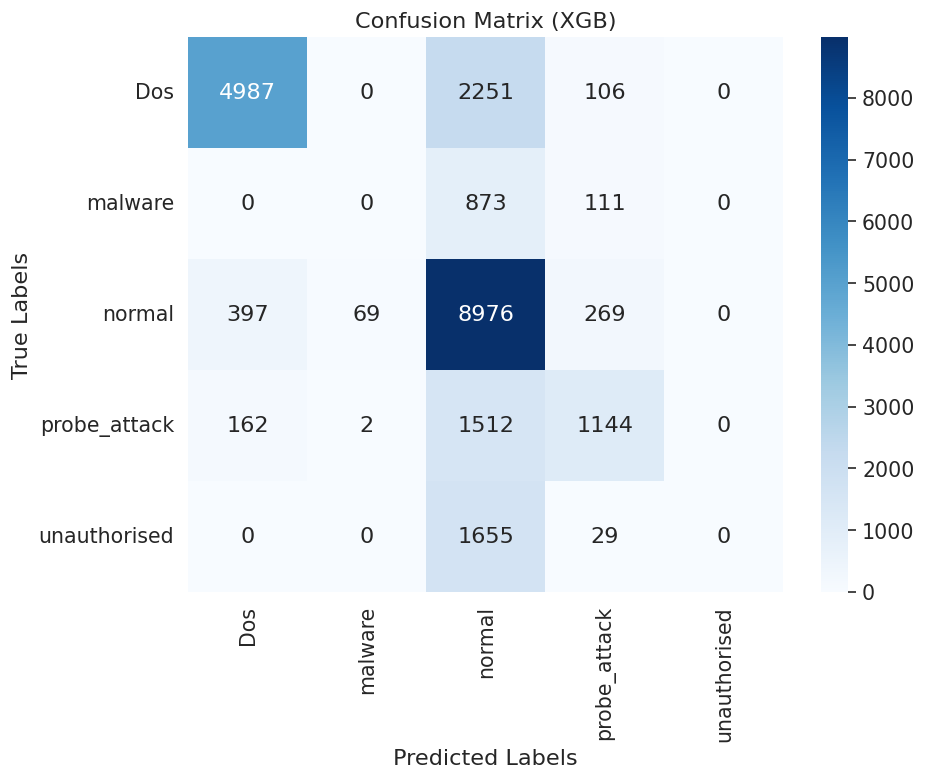

In [92]:
mat = confusion_matrix(y_T, test_val)
class_names = ["Dos", "malware", "normal", "probe_attack", "unauthorised"]
plt.figure(figsize=(8, 6))
sns.heatmap(mat, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix (XGB)")
plt.show()

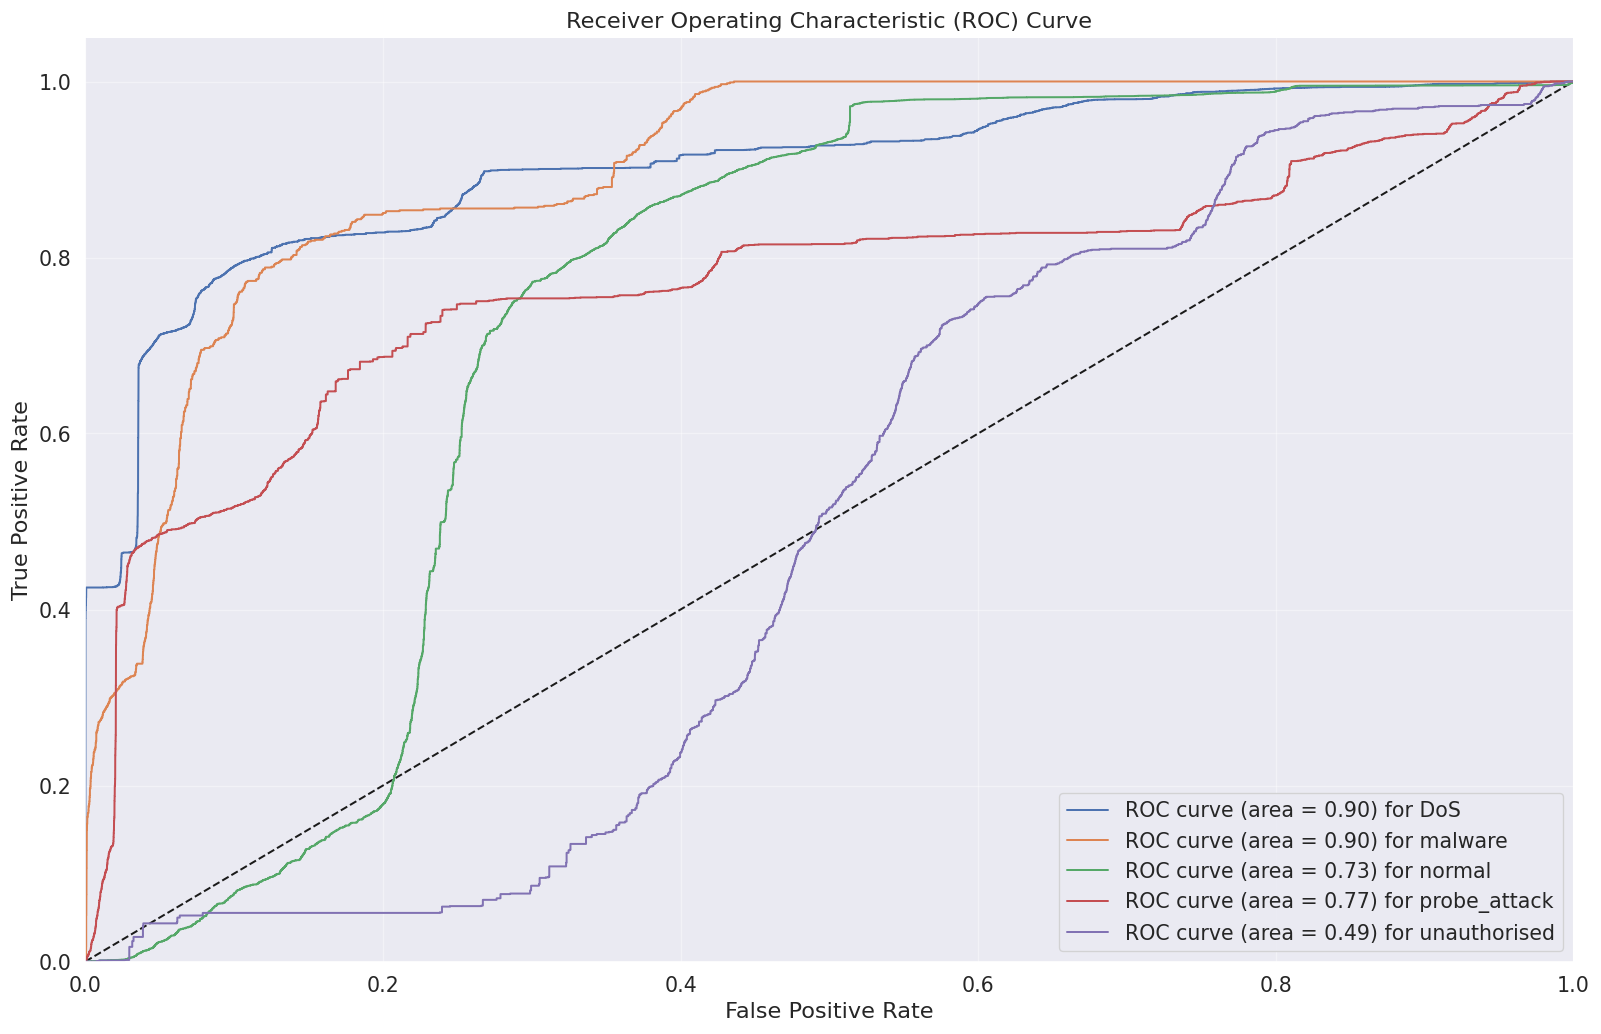

In [93]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

def plot_multiclass_roc(clf, X_T, y_T, n_classes, class_labels, figsize=(17, 6)):
    y_score = clf.decision_function(X_T)

    # structures
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    # calculate dummies once
    y_test_dummies = pd.get_dummies(y_T, drop_first=False).values
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_dummies[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # roc for each class
    fig, ax = plt.subplots(figsize=figsize)
    ax.plot([0, 1], [0, 1], 'k--')
    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title('Receiver Operating Characteristic (ROC) Curve')
    for i in range(n_classes):
        ax.plot(fpr[i], tpr[i], label=f'ROC curve (area = {roc_auc[i]:.2f}) for {class_labels[i]}')
    ax.legend(loc="best")
    ax.grid(alpha=.4)
    sns.despine()
    plt.show()

# Define the class labels according to the specified array
class_labels = ['DoS', 'malware', 'normal', 'probe_attack', 'unauthorised']

# Call the function with the modified class_labels array
plot_multiclass_roc(SVM_classifier, X_T, y_T, n_classes=5, class_labels=class_labels, figsize=(16, 10))